## EDA And Feature Engineering Of Google Play Store Dataset</strong>


PROBLEM STATEMENT
1. Description: Today , 1.85 million different apps are available for users to download . Android users have even more from which to choose, with 2.56 million avaialble through the Google Play Store. These apps have come to play a huge role in the way we live our lives today.

2. Objective:
    Find the app with largest number of installs
    
    The app with largest size
    
    To find most popular category of app
    
3. Overview of Dataset:
    The dataset consist of 20 columns and 10841 rows.

<strong>Steps We Are Going To Follow</strong>
1. Data Cleaning
2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
##missing value

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<strong>observation</strong>


The Dataset has missing values

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [10]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [12]:
df['Reviews'].str.isnumeric().sum()

10840

In [13]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_copy=df.copy()

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])

In [16]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [19]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [22]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']

for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [25]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [27]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [29]:
df_copy['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [30]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [31]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year


In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [33]:
df_copy['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## EDA

In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [36]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## observation

The datset has duplicate records

In [37]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [38]:
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [39]:
##lets go ahead and explore more data

numeric_features=[feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

##print columns
print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features:{}'.format(len(categorical_features),categorical_features))

we have 9 numerical features :['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


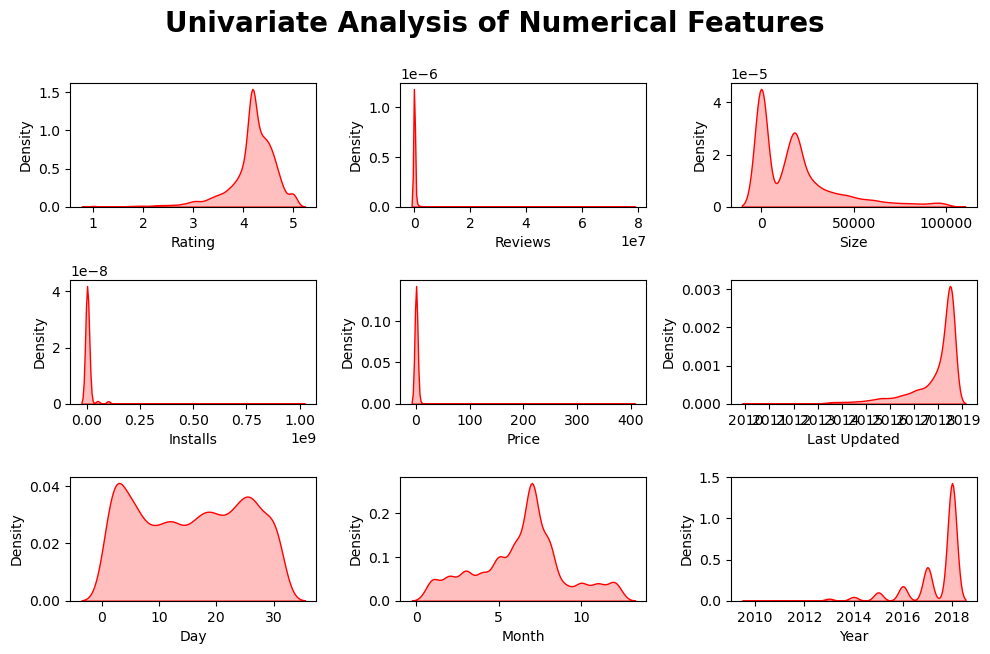

In [81]:
##Visulaization diagram for Numerical features

plt .figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=1,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
                          




## Observations

Ratings and Year are Left Skewed 


Reviews,Size,Installs and Price are right skewed

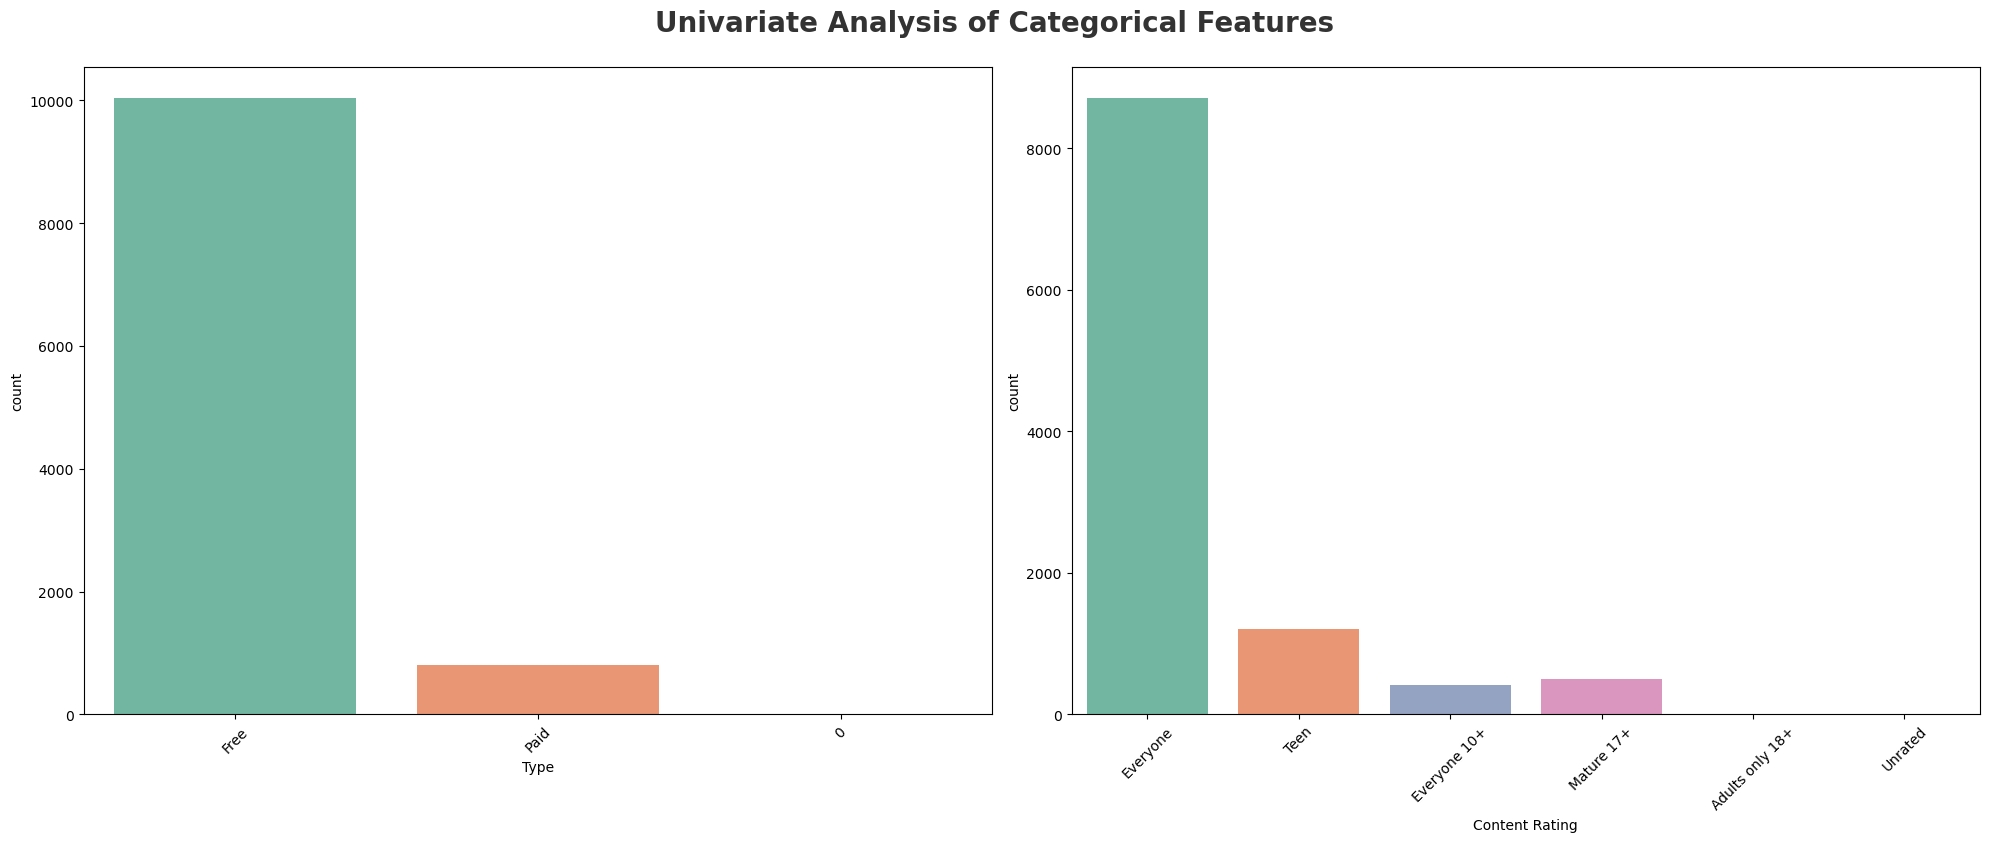

In [41]:
##Categorical features

plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.)
category=['Type','Content Rating']

for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## which is the most popular app category?

In [42]:
df_copy['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [43]:
len(df_copy['Category'].unique())

33

<AxesSubplot: ylabel='Category'>

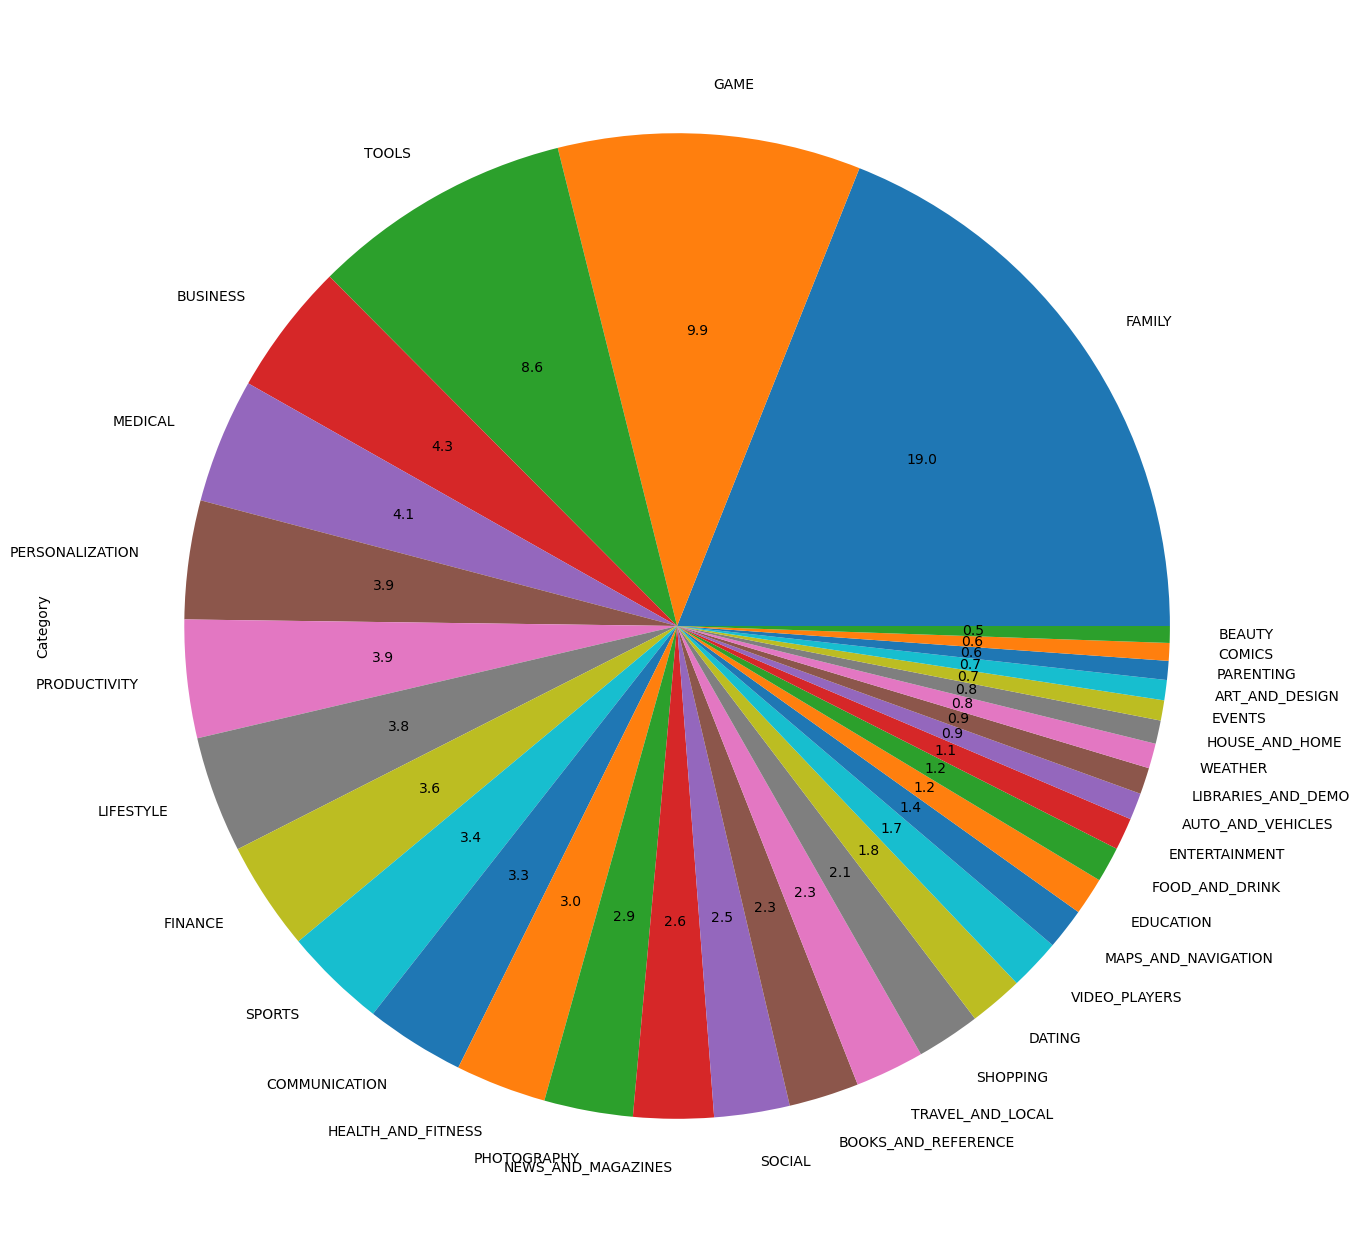

In [85]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(20,16), autopct= '%1.1f')

## Observations
1. There are more kind of apps in playstore which are under catgory of family,games and tools
2. Beauty,comics , arts and Weather related apps are very less in Playstore

## What are Top 10 App Categories

In [45]:
Category=pd.DataFrame(df_copy['Category'].value_counts())
Category.rename(columns={'Category':'Count'},inplace='True')

In [46]:
Category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


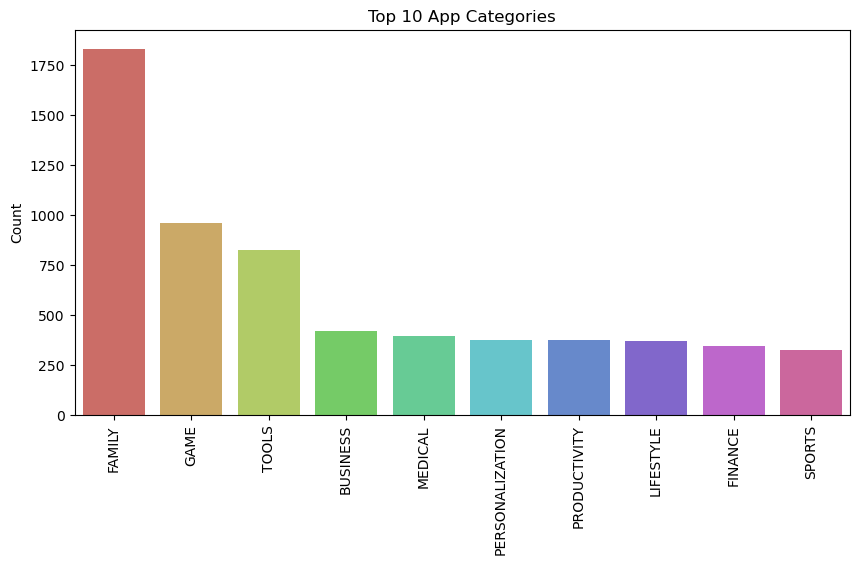

In [47]:
##top 10 apps

plt.figure(figsize=(10,5))
sns.barplot(x=Category.index[:10],y='Count',data=Category[:10],palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

## Insights

1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the beauty category with less than 1% of the total appd belonging to it.

## which category has largest number of installations?

In [48]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [49]:
maxi= np.max(df_copy['Installs'])

In [50]:
maxi

1000000000

In [51]:
df_copy['Category'][df_copy['Installs']==maxi]

152     BOOKS_AND_REFERENCE
335           COMMUNICATION
336           COMMUNICATION
338           COMMUNICATION
340           COMMUNICATION
341           COMMUNICATION
391           COMMUNICATION
865           ENTERTAINMENT
1654                   GAME
2544                 SOCIAL
2545                 SOCIAL
2554                 SOCIAL
2808            PHOTOGRAPHY
3117       TRAVEL_AND_LOCAL
3127       TRAVEL_AND_LOCAL
3234                  TOOLS
3454           PRODUCTIVITY
3665          VIDEO_PLAYERS
3687          VIDEO_PLAYERS
3736     NEWS_AND_MAGAZINES
Name: Category, dtype: object

In [52]:
df_copy['Category'][df_copy['Installs']==maxi].unique()

array(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME',
       'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES'],
      dtype=object)

## Observations
BOOKS_AND_REFERENCE, COMMUNICATION, ENTERTAINMENT, GAME,
       SOCIAL, PHOTOGRAPHY, TRAVEL_AND_LOCAL, TOOLS,
       PRODUCTIVITY, VIDEO_PLAYERS, NEWS_AND_MAGAZINES are the categories which has largest number of installations 
        

In [53]:
df_copy['Installs'].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [54]:
cat_install=pd.DataFrame(df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False))
cat_install.reset_index(inplace=True)

In [55]:
cat_install.head()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902


In [56]:
cat_install.columns

Index(['Category', 'Installs'], dtype='object')

In [57]:
cat_install['Category'][0:10]

0                  GAME
1         COMMUNICATION
2                 TOOLS
3          PRODUCTIVITY
4                SOCIAL
5           PHOTOGRAPHY
6                FAMILY
7         VIDEO_PLAYERS
8      TRAVEL_AND_LOCAL
9    NEWS_AND_MAGAZINES
Name: Category, dtype: object

In [58]:
cat_install['Installs'][0:10]

0    13878924415
1    11038276251
2     8001771915
3     5793091369
4     5487867902
5     4649147655
6     4427941505
7     3926902720
8     2894887146
9     2369217760
Name: Installs, dtype: int64

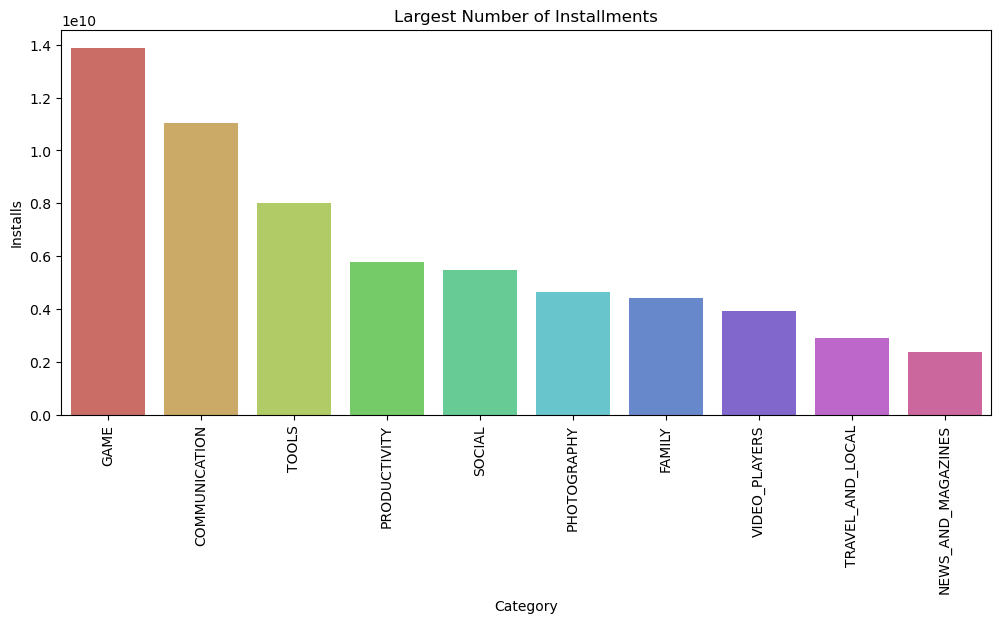

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x=cat_install['Category'][:10],y=cat_install['Installs'][:10],data=cat_install,palette='hls')
plt.title('Largest Number of Installments')
plt.xticks(rotation=90)
plt.show()

## Observations
1. Game apps are installed the most

## which category has least number of installations?

In [60]:
least_install=pd.DataFrame(df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=True))
least_install.reset_index(inplace=True)

In [61]:
least_install

,Category,Installs
0,EVENTS,15973161
1,BEAUTY,27197050
2,PARENTING,31521110
3,MEDICAL,38193177
4,COMICS,44981150
5,LIBRARIES_AND_DEMO,52995910
6,AUTO_AND_VEHICLES,53130211
7,HOUSE_AND_HOME,97212461
8,ART_AND_DESIGN,114338100
9,DATING,140926107


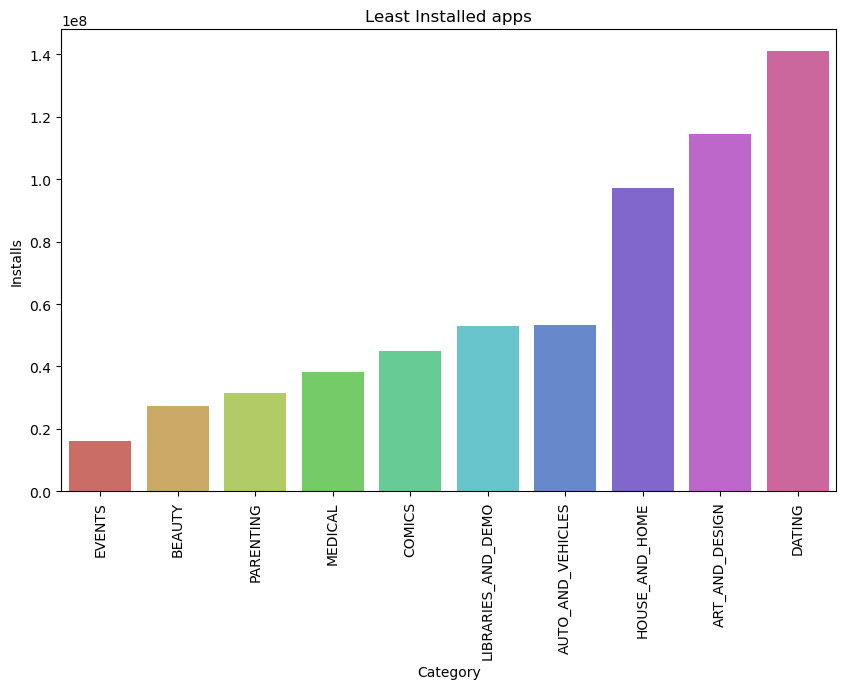

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=least_install['Category'][0:10],y=least_install['Installs'][0:10],data=least_install,palette='hls')
plt.title("Least Installed apps")
plt.xticks(rotation=90)
plt.show()

## Observations
1. Apps related to events are less in number

## How many Apps are there on Google Play store which get 5 ratings?

In [63]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [64]:
df_copy['Rating'].mean()


4.173243045387994

In [65]:
df_copy['Rating'].fillna(df_copy['Rating'].mean(),inplace=True)
df_copy['Rating'].astype('float')

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.173243
10839    4.500000
10840    4.500000
Name: Rating, Length: 9659, dtype: float64

In [66]:
(df_copy[df_copy['Rating']==5])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,19,6,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,31,12,2017
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,5,3,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,27,6,2018


In [67]:
len(df_copy[df_copy['Rating']==5])

271

## Observation

There are 271 apps which are rated as 5 on Google Playstore 

In [68]:
## App with Largest size

In [71]:

df_copy['Size'].dtype

dtype('float64')

In [73]:
df_copy['Size'].fillna(df_copy['Size'].mean(),inplace=True)

In [75]:
df_copy['Size'].isnull().sum()

0

In [79]:
np.max(df_copy['Size'])

100000.0

In [77]:
df_copy[df_copy['Size']==np.max(df_copy['Size'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
1080,Post Bank,FINANCE,4.5,60449,100000.0,1000000,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up,23,7,2018
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up,16,7,2018
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,25,7,2018
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000,Free,0.00,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,20,7,2018
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500,Paid,15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up,14,1,2018
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000.0,5000,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,2,8,2018
5427,Ultimate Tennis,SPORTS,4.3,183004,100000.0,10000000,Free,0.00,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,19,7,2018
5530,The Walking Dead: Our World,GAME,4.0,22435,100000.0,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up,1,8,2018
5862,Miami crime simulator,GAME,4.0,254518,100000.0,10000000,Free,0.00,Mature 17+,Action,2018-07-09,2.0,4.0 and up,9,7,2018
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000.0,10000000,Free,0.00,Mature 17+,Simulation,2018-05-31,2.1,4.0 and up,31,5,2018


In [78]:
len(df_copy[df_copy['Size']==np.max(df_copy['Size'])])

14

## Observations
There are 14 apps which has maximum size=100000.0